In [21]:
from sudoku_generation import SudokuGenerator

In [10]:
!pip3 install matplotlib
!pip3 install py-sudoku

  Using cached py_sudoku-1.0.3-py3-none-any.whl.metadata (8.4 kB)
Using cached py_sudoku-1.0.3-py3-none-any.whl (7.1 kB)


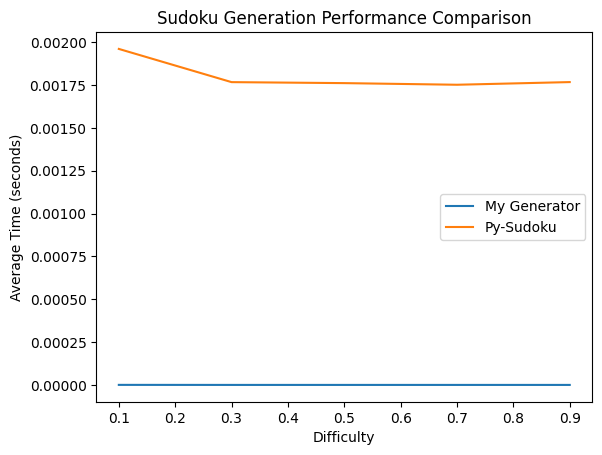

In [18]:
import random
import time
import matplotlib.pyplot as plt
from sudoku import Sudoku

def main():
    difficulties = [0.1, 0.3, 0.5, 0.7, 0.9]
    my_generator_times = []
    py_sudoku_times = []

    for difficulty in difficulties:
        my_generator_total_time = 0
        py_sudoku_total_time = 0
        for _ in range(40):
            start_time = time.time()
            my_generator = SudokuGenerator(difficulty)
            end_time = time.time()
            my_generator_total_time += (end_time - start_time)

            start_time = time.time()
            grid = Sudoku(3).difficulty(difficulty)
            end_time = time.time()
            py_sudoku_total_time += (end_time - start_time)

        my_generator_average_time = my_generator_total_time / 40
        py_sudoku_average_time = py_sudoku_total_time / 40

        my_generator_times.append(my_generator_average_time)
        py_sudoku_times.append(py_sudoku_average_time)

    plt.plot(difficulties, my_generator_times, label='My Generator')
    plt.plot(difficulties, py_sudoku_times, label='Py-Sudoku')
    plt.xlabel('Difficulty')
    plt.ylabel('Average Time (seconds)')
    plt.title('Sudoku Generation Performance Comparison')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [22]:
"""
Sudoku
"""
import sys
from collections import deque
from copy import deepcopy

class Solver:
    """
    This class represents a Sudoku solver application.
    """

    def check_start_board(self, grid):
        """
        Checking correctness of start board
        """
        for ind in range(9):
            ratio = set()
            for el in grid[ind]:
                if el not in ratio and el != 0:
                    ratio.add(el)
                elif el != 0:
                    return False

        for y_index in range(9):
            ratio.clear()
            for i in range(9):
                if grid[i][y_index] not in ratio and grid[i][y_index] != 0:
                    ratio.add(grid[i][y_index])
                elif grid[i][y_index] != 0:
                    return False

        for start_x in range(0, 9, 3):
            for start_y in range(0, 9, 3):
                ratio.clear()
                for i in range(3):
                    for j in range(3):
                        num = grid[start_x + i][start_y + j]
                        if num not in ratio and num != 0:
                            ratio.add(num)
                        elif num != 0:
                            return False
        return True

    @staticmethod
    def check_board(grid, y_index, x_index, num):
        """
        Checks if a number can be placed in a specific cell on the Sudoku grid.
        """
        grid_copy = deepcopy(grid)
        grid_copy[x_index][y_index] = num

        ratio = set()
        for el in grid_copy[x_index]:
            if el not in ratio and el != 0:
                ratio.add(el)
            elif el != 0:
                return False

        ratio.clear()
        for i in range(9):
            if grid_copy[i][y_index] not in ratio and grid_copy[i][y_index] != 0:
                ratio.add(grid_copy[i][y_index])
            elif grid_copy[i][y_index] != 0:
                return False

        ratio.clear()
        start_x = (x_index // 3) * 3
        start_y = (y_index // 3) * 3
        for i in range(3):
            for j in range(3):
                num = grid_copy[start_x + i][start_y + j]
                if num not in ratio and num != 0:
                    ratio.add(num)
                elif num != 0:
                    return False
        return True

    def complete(self, grid):
        """
        Recursively completes the Sudoku grid.
        """
        empty_cells = deque([])
        for y in range(9):
            for x in range(9):
                if grid[y][x] == 0:
                    empty_cells.append((y, x))
        if not empty_cells:
            return True
        y, x = empty_cells.popleft()
        for num in range(1, 10):
            if self.check_board(grid, x, y, num):
                grid[y][x] = num
                if self.complete(grid):
                    return True
                grid[y][x] = 0
        return False

def main(grid):
    solver = Solver()
    for line_num, line in enumerate(grid):
        for el_num, el in enumerate(line):
            if not el:
                grid[line_num][el_num] = 0
    solver.complete(grid)


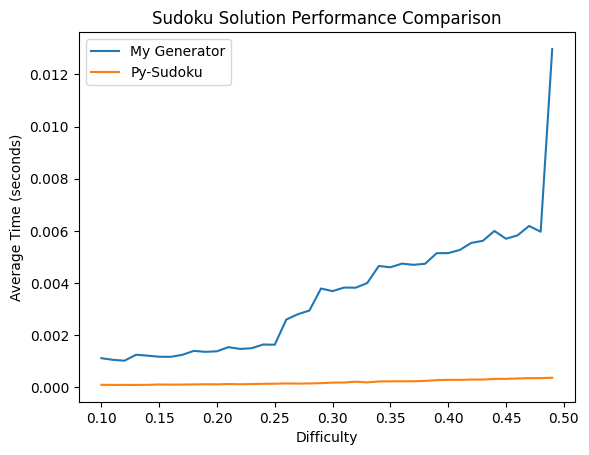

In [32]:
import time
import matplotlib.pyplot as plt
from sudoku import Sudoku

def main():
    my_generator_times = []
    py_sudoku_times = []
    difficulties = []

    for difficulty in range(10, 50):
        difficulty /= 100
        difficulties.append(difficulty)
        grid = Sudoku(3).difficulty(difficulty)
        start_time = time.time()
        solution = grid.solve()
        end_time = time.time()
        py_sudoku_time = end_time - start_time

        grid = grid.board
        for line_num, line in enumerate(grid):
            for el_num, el in enumerate(line):
                if not el:
                    grid[line_num][el_num] = 0
        solver = Solver()
        start_time = time.time()
        my_generator = solver.complete(grid)
        end_time = time.time()
        my_generator_time = end_time - start_time

        my_generator_average_time = my_generator_time
        py_sudoku_average_time = py_sudoku_time

        my_generator_times.append(my_generator_average_time)
        py_sudoku_times.append(py_sudoku_average_time)

    plt.plot(difficulties, my_generator_times, label='My Generator')
    plt.plot(difficulties, py_sudoku_times, label='Py-Sudoku')
    plt.xlabel('Difficulty')
    plt.ylabel('Average Time (seconds)')
    plt.title('Sudoku Solution Performance Comparison')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
